In [1]:
import pandas as pd
hotels =  pd.read_csv("./hotel_booking_data.csv")
hotels.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


## 作業資料集中最常見的前五個姓氏是什麼?

In [ ]:
hotels["name"].apply(lambda name : name.split()[1]).value_counts()[:5]

name
Smith       2510
Johnson     1998
Williams    1628
Jones       1441
Brown       1433
Name: count, dtype: int64

In [7]:
#住宿預訂了最多的兒童和嬰兒前三筆 的'name','adults' ,'babies','children'
#hotels.info()
hotels["total_kids"] = hotels["babies"] + hotels["children"]   

In [8]:
hotels.sort_values("total_kids",ascending=False).head(3)[["name","adults","babies","children"]]

,name,adults,babies,children
328,Jamie Ramirez,2,0,10.0
46619,Nicholas Parker,2,10,0.0
78656,Marc Robinson,1,9,0.0


# 要找出電話號碼中最常見的前三個區號（區號是前三個數字）

In [11]:
hotels["phone-number"].apply(lambda phone:phone[:3]).value_counts()[:3]

phone-number
799    168
185    167
541    166
Name: count, dtype: int64

## 有多少次check-in是在每個月的1日至15日之間發生的（包括1日和15日）？

In [13]:
# arrival_date_day_of_month
hotels["arrival_date_day_of_month"].apply(lambda day: day in range(1,16)).sum()

58152

# Scatter Plots

In [14]:
import pandas as pd
import seaborn as sns

In [15]:
df = pd.read_csv("dm_office_sales.csv")

In [16]:
df.head()

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802


<Axes: xlabel='salary', ylabel='sales'>

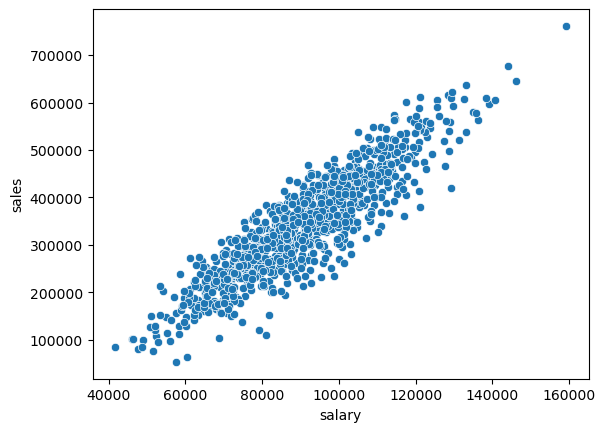

In [19]:
sns.scatterplot(x="salary",y="sales",data=df)

<Axes: xlabel='salary', ylabel='sales'>

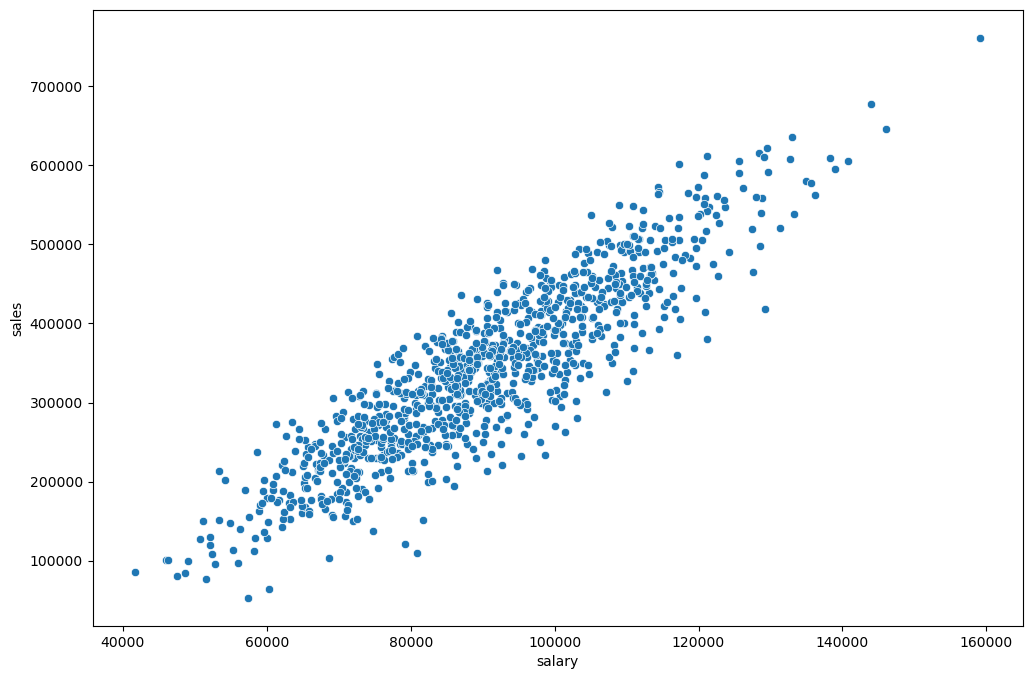

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.scatterplot(x="salary",y="sales",data=df)

## Seaborn Parameters

The hue and palette parameters are commonly available around many plot calls in seaborn.

### hue

Color points based off a categorical feature in the DataFrame

在Python的`seaborn`圖表庫中使用`scatterplot`函數繪製散點圖時，`hue`參數用來表示顏色。當設定`hue='division'`時，意味著散點圖上的點將根據`division`這一欄位的值來分配顏色，不同的`division`值會使用不同的顏色表示。這樣做可以幫助觀察者更清楚地看到不同部門(`division`)在薪水(`salary`)和銷售(`sales`)之間的關係差異。

<Axes: xlabel='salary', ylabel='sales'>

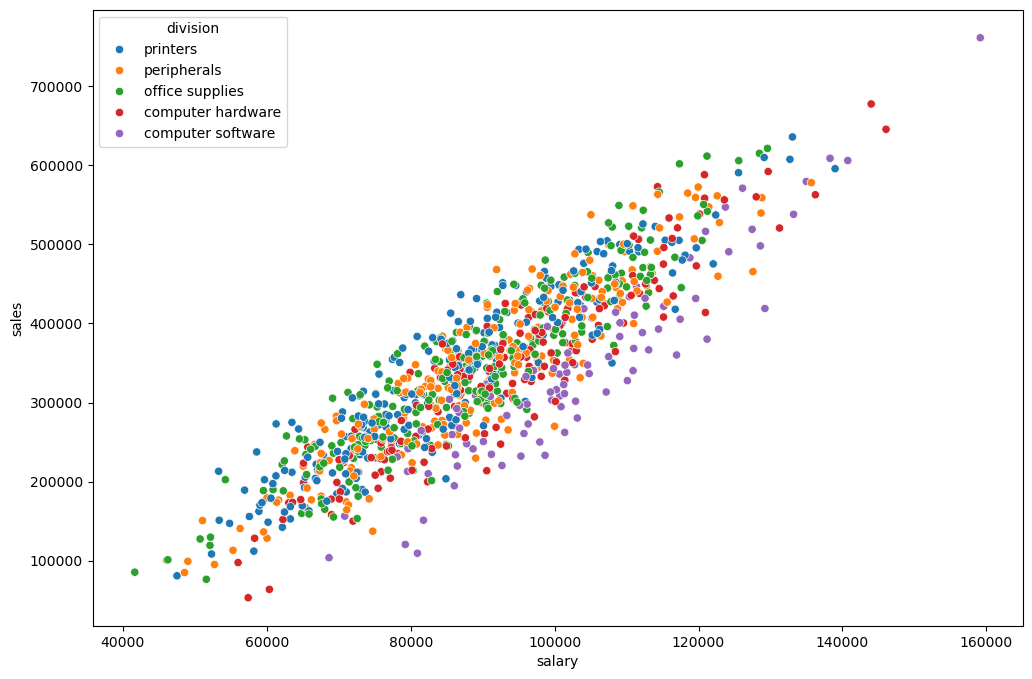

In [21]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="salary",y="sales",data=df,hue="division")

<Axes: xlabel='salary', ylabel='sales'>

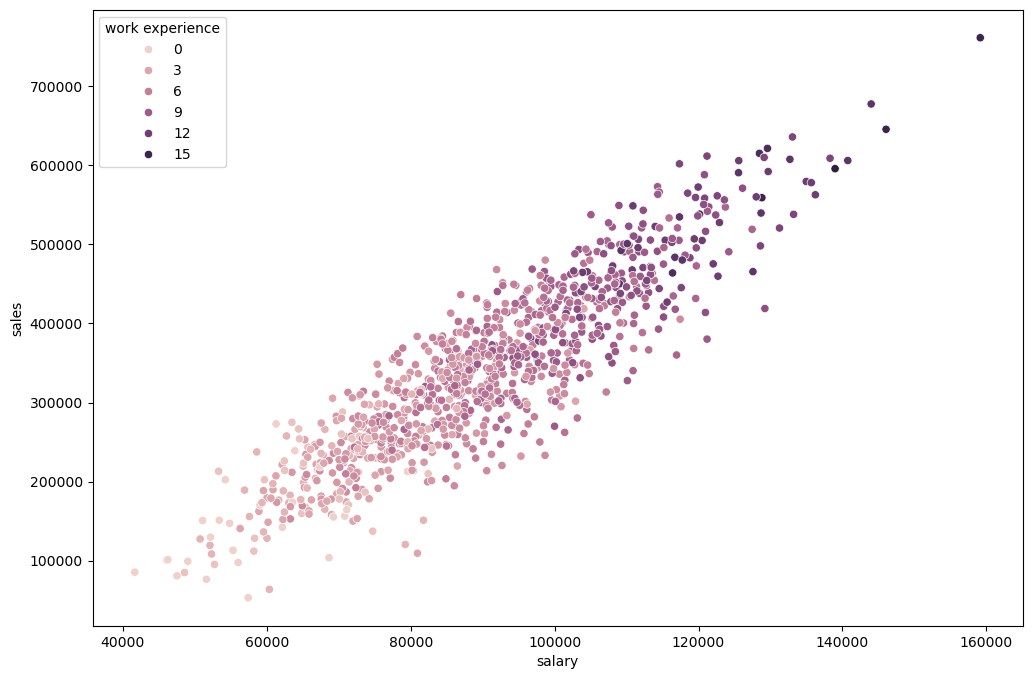

In [22]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="salary",y="sales",data=df,hue="work experience")

**Choosing a palette from Matplotlib's cmap: https://matplotlib.org/tutorials/colors/colormaps.html**

<Axes: xlabel='salary', ylabel='sales'>

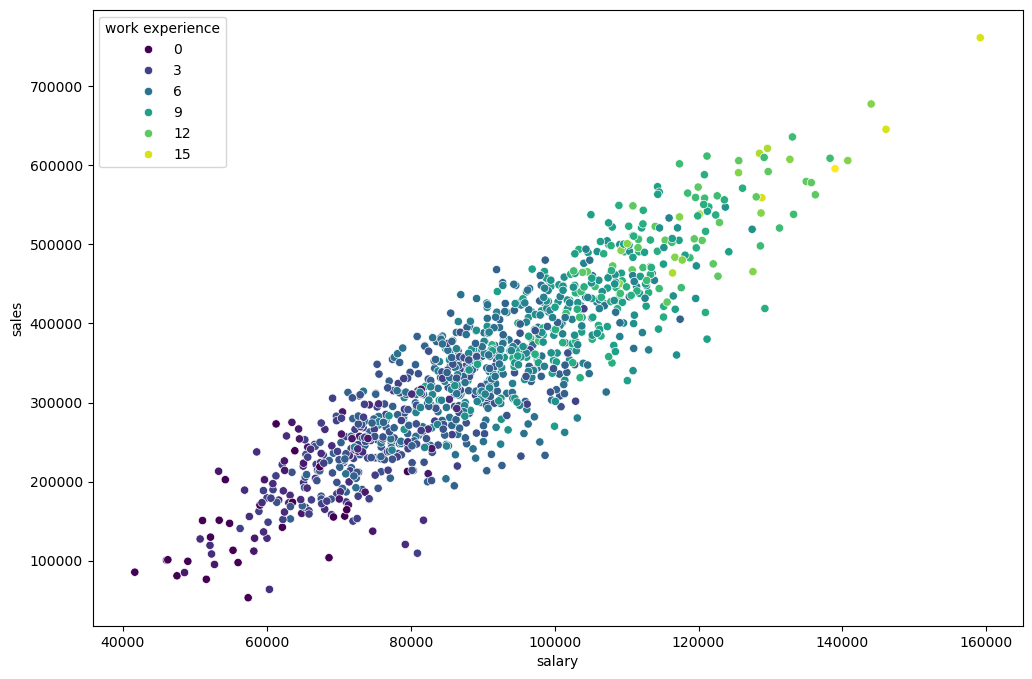

In [23]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="salary",y="sales",data=df,hue="work experience",palette="viridis")

<Axes: xlabel='salary', ylabel='sales'>

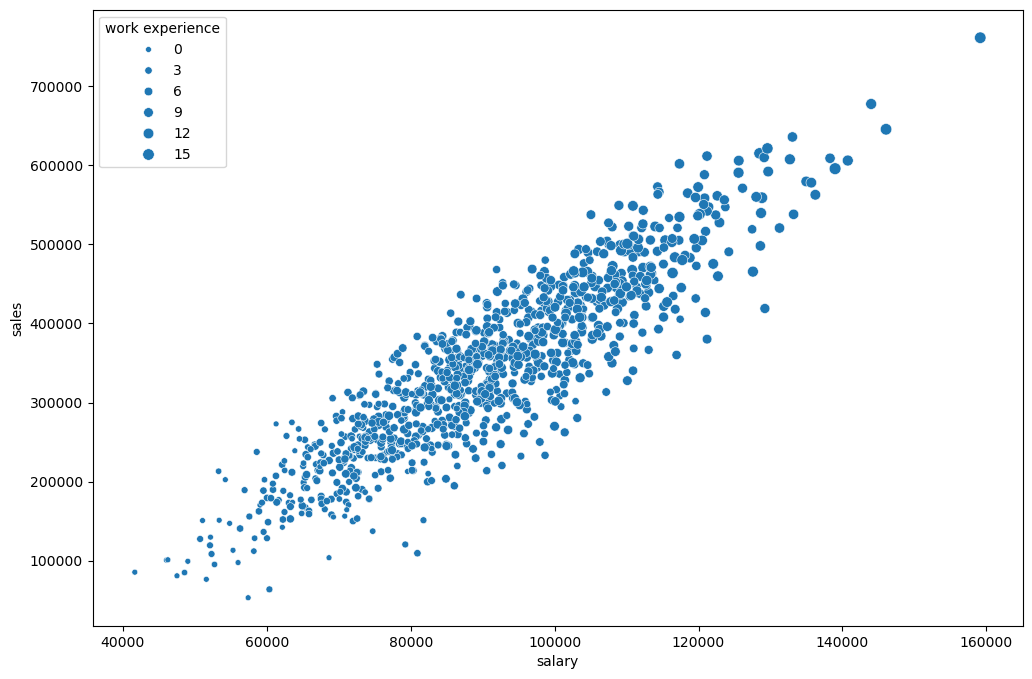

In [30]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="salary",y="sales",data=df,size="work experience")

<Axes: xlabel='salary', ylabel='sales'>

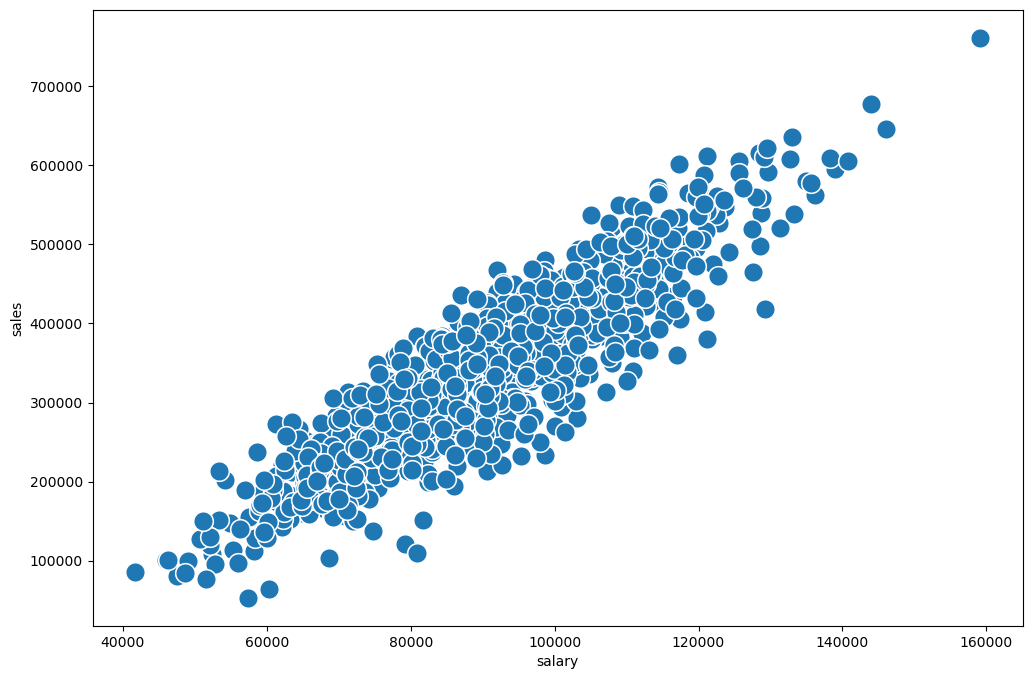

In [31]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="salary",y="sales",data=df,s=200)

<Axes: xlabel='salary', ylabel='sales'>

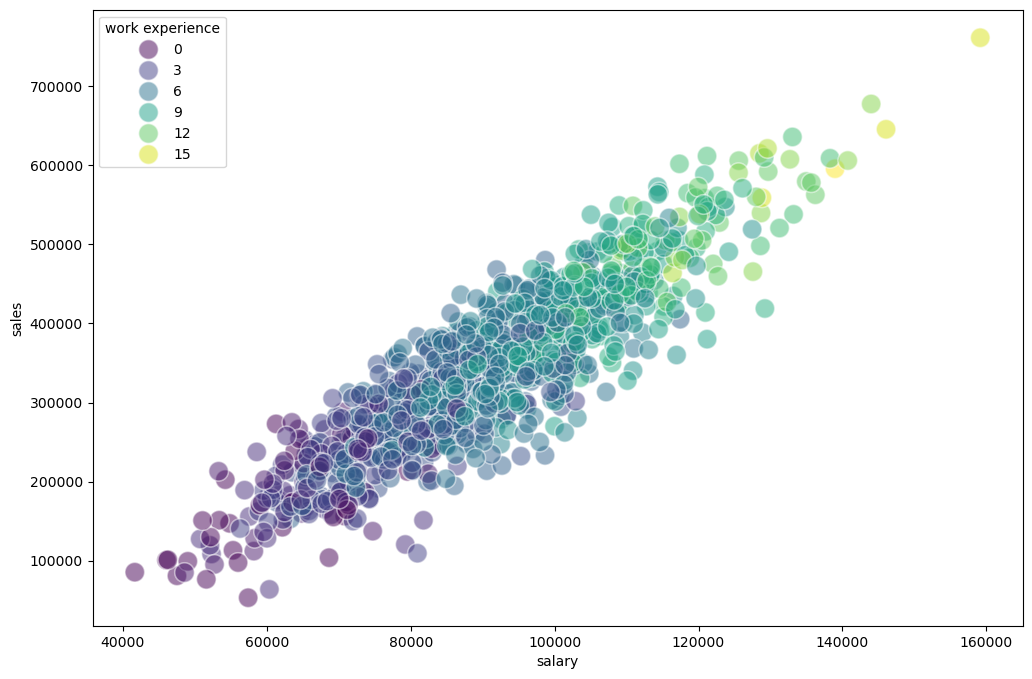

In [35]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="salary",y="sales",data=df,hue="work experience",palette="viridis",s=200,alpha=0.5)

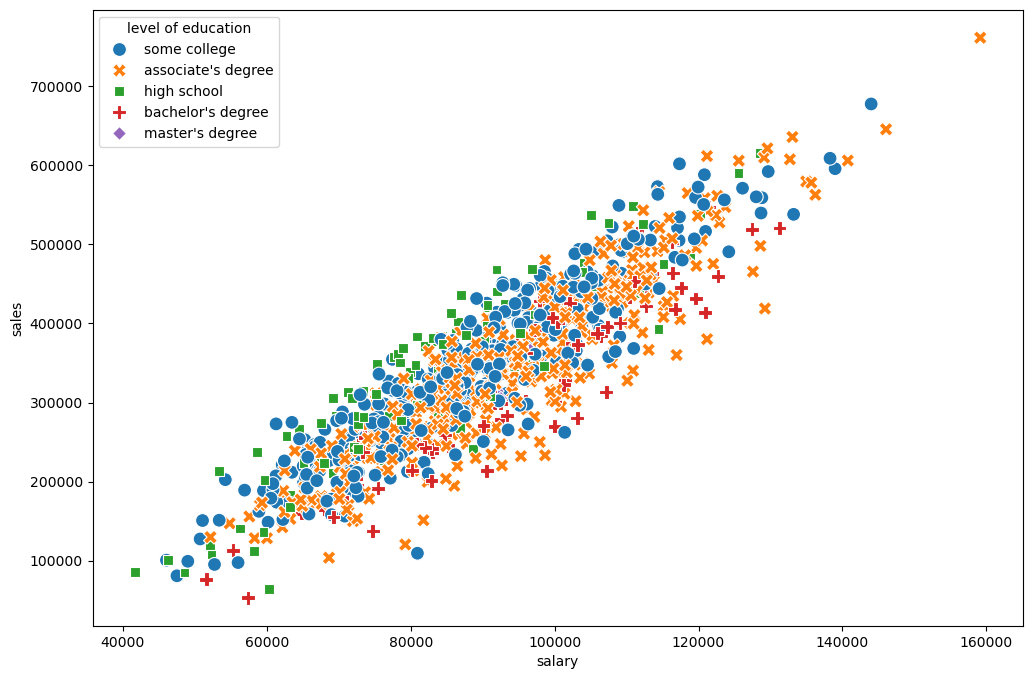

In [41]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="salary",y="sales",data=df,style="level of education",s=100,hue="level of education")
plt.savefig("test_scatter.jpg")

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv("dm_office_sales.csv")

In [44]:
df.head()

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802


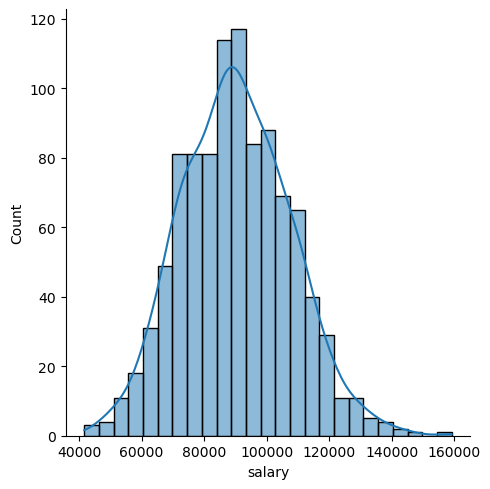

In [46]:
sns.displot(data=df,x="salary",kde=True)

<Axes: xlabel='salary', ylabel='Count'>

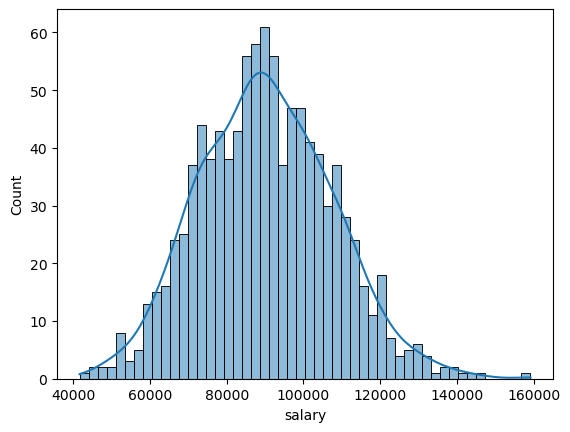

In [50]:
sns.histplot(data=df,x="salary",bins=50,kde=True)

<Axes: xlabel='division', ylabel='count'>

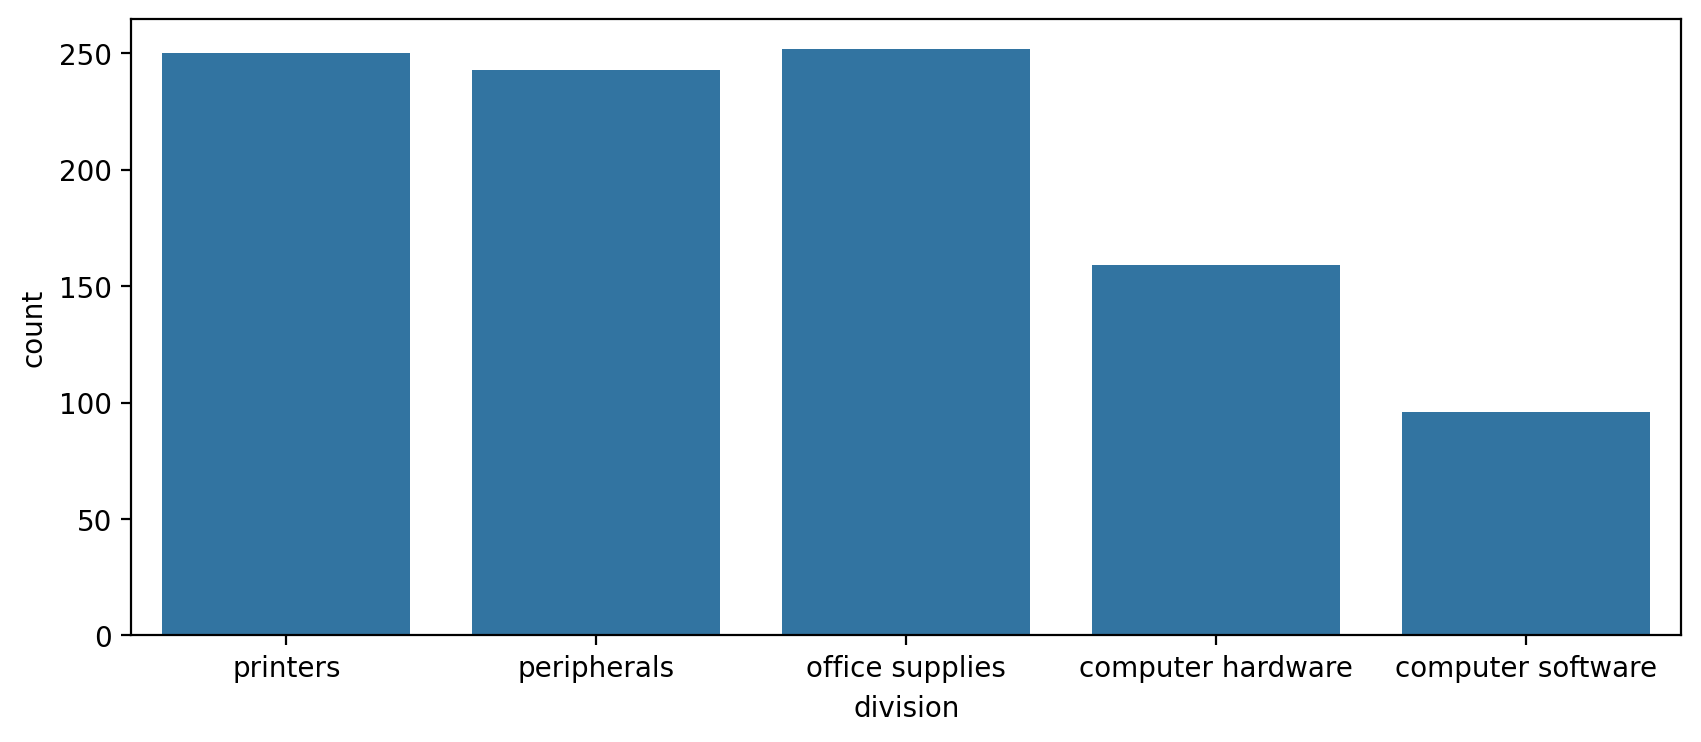

In [51]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(x="division",data=df)

In [ ]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(x="level of education",data = df,hue="level of education")

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

<Axes: xlabel='level of education', ylabel='count'>

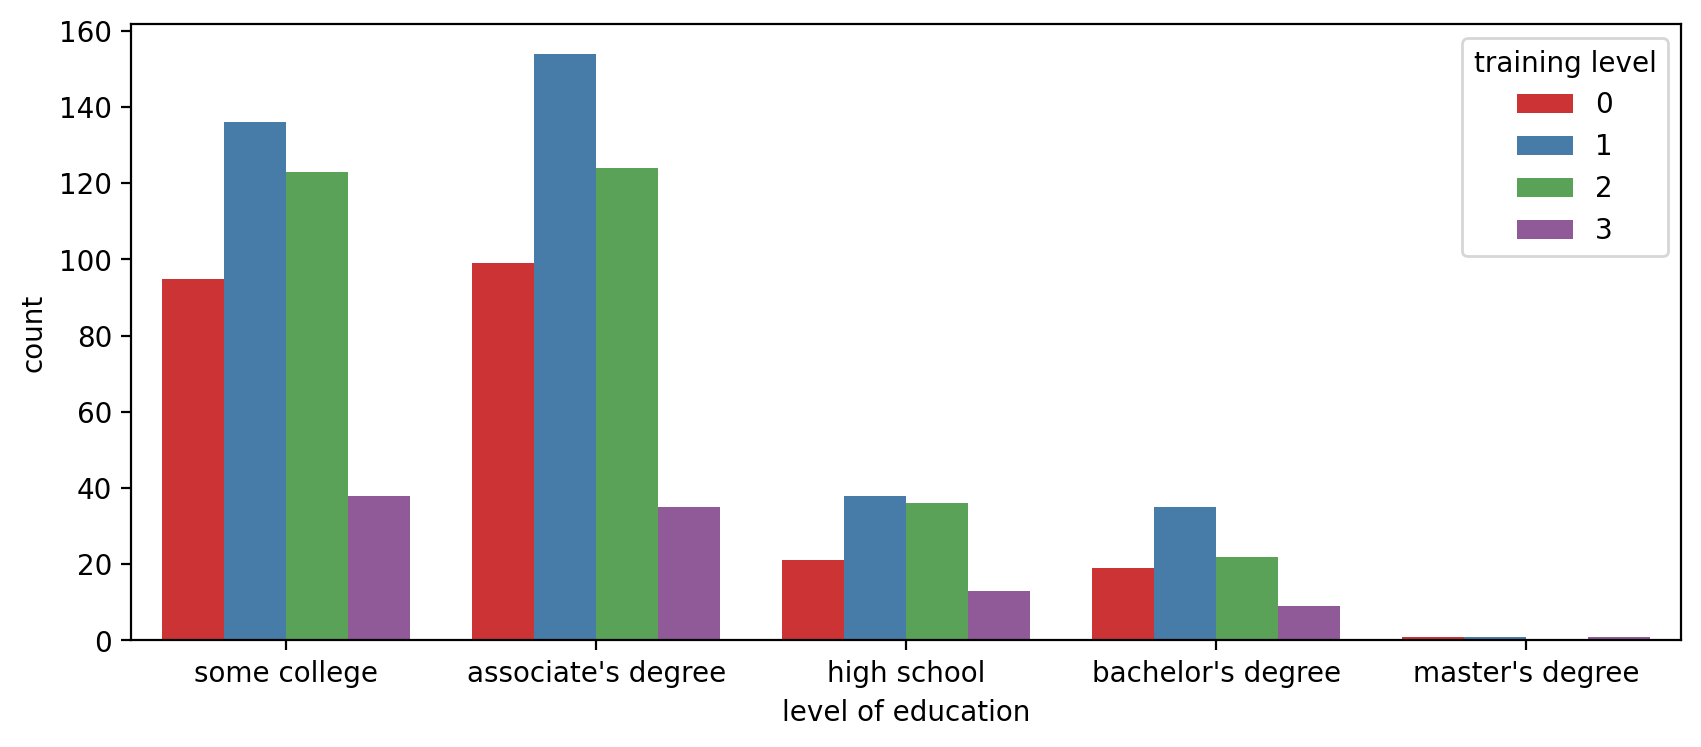

In [57]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(x="level of education",data = df,hue="training level",palette="Set1")

<Axes: xlabel='level of education', ylabel='salary'>

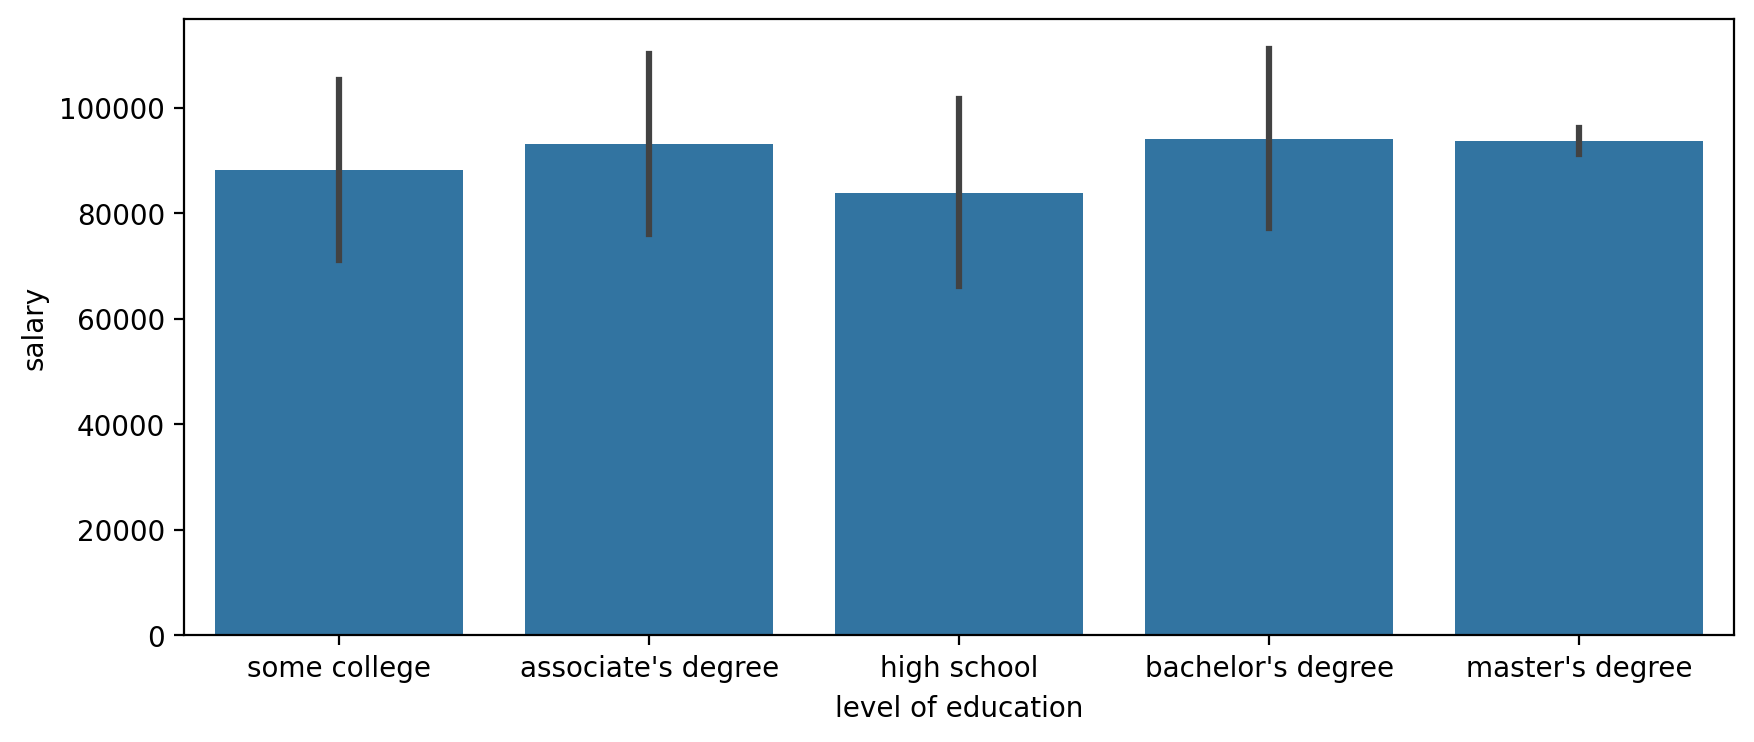

In [ ]:
plt.figure(figsize=(10,4),dpi=200)
#垂直線被稱為誤差條（error bars），其作用如下：
#越長表示差異越大
#estimator np.mean 是平均薪水
#errorbar 平均薪水的標準差
sns.barplot(x="level of education",y="salary",data=df,estimator=np.mean,errorbar="sd")

<Axes: xlabel='level of education', ylabel='salary'>

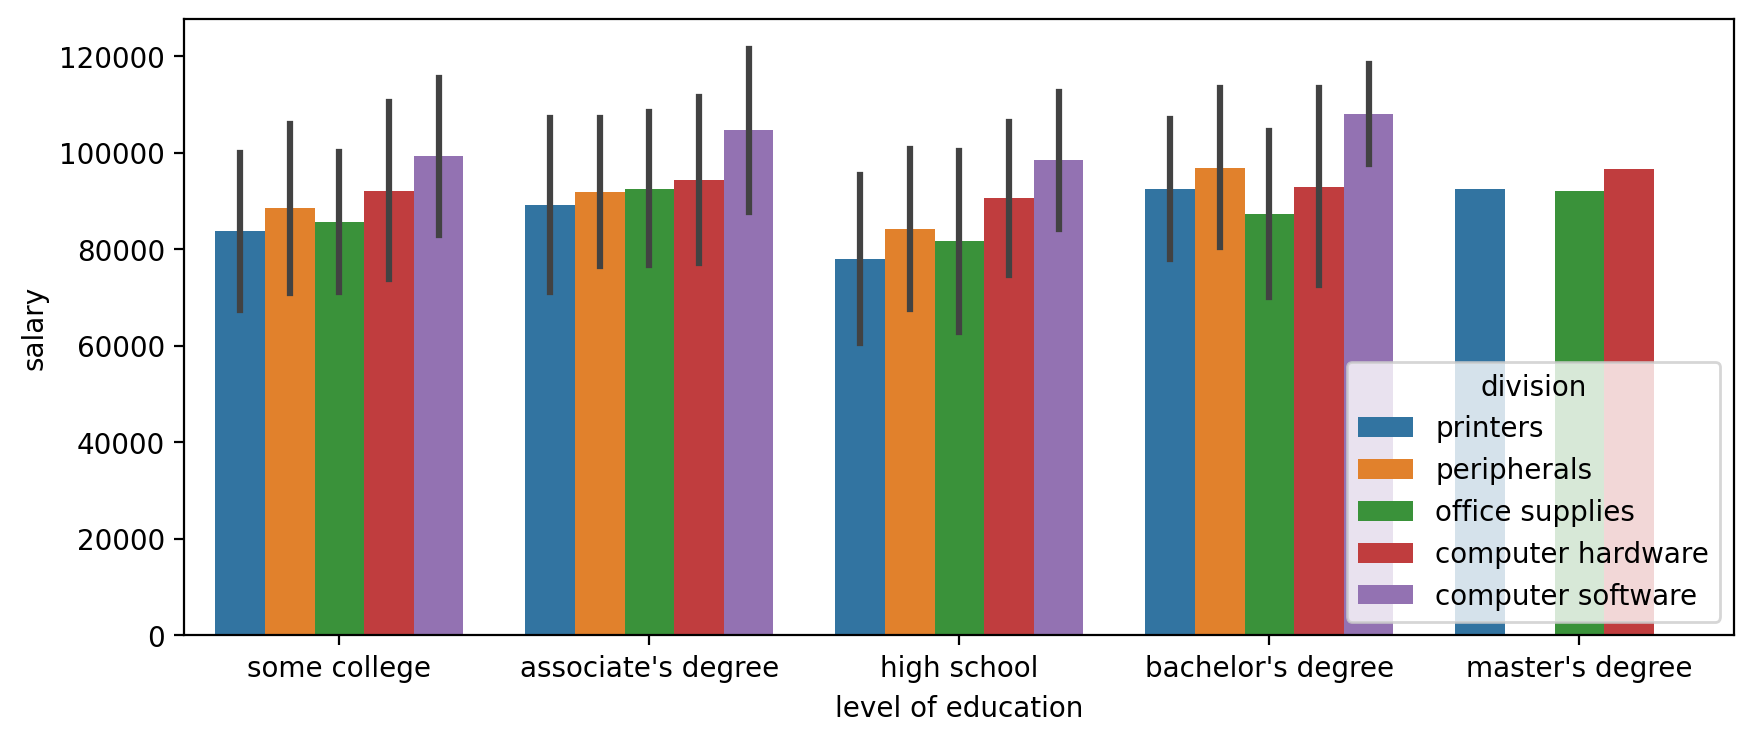

In [61]:
plt.figure(figsize=(10,4),dpi=200)
#垂直線被稱為誤差條（error bars），其作用如下：
#越長表示差異越大
#estimator np.mean 是平均薪水
#errorbar 平均薪水的標準差
sns.barplot(x="level of education",y="salary",data=df,estimator=np.mean,errorbar="sd",hue="division")

In [62]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<Axes: xlabel='parental level of education', ylabel='math score'>

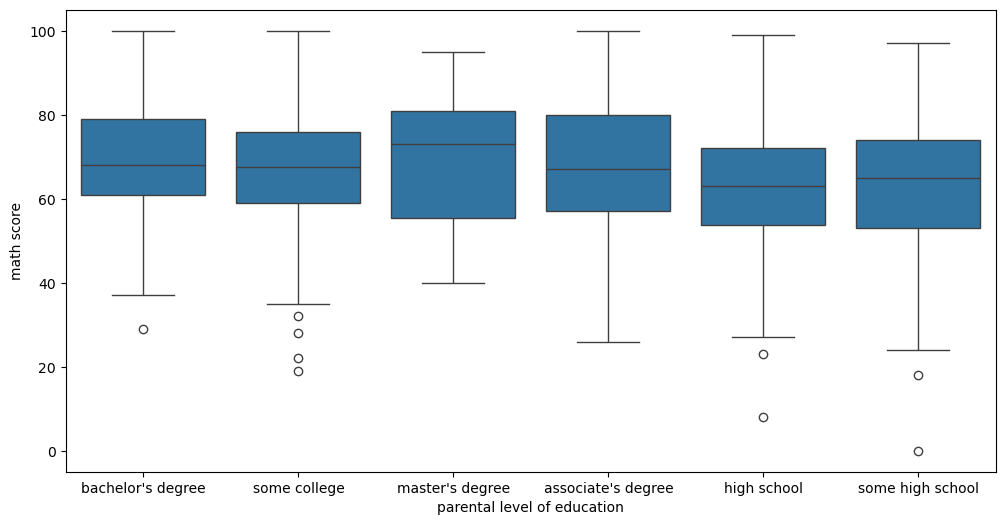

In [63]:
plt.figure(figsize=(12,6))
sns.boxplot(x="parental level of education",y="math score",data=df)

<Axes: xlabel='parental level of education', ylabel='math score'>

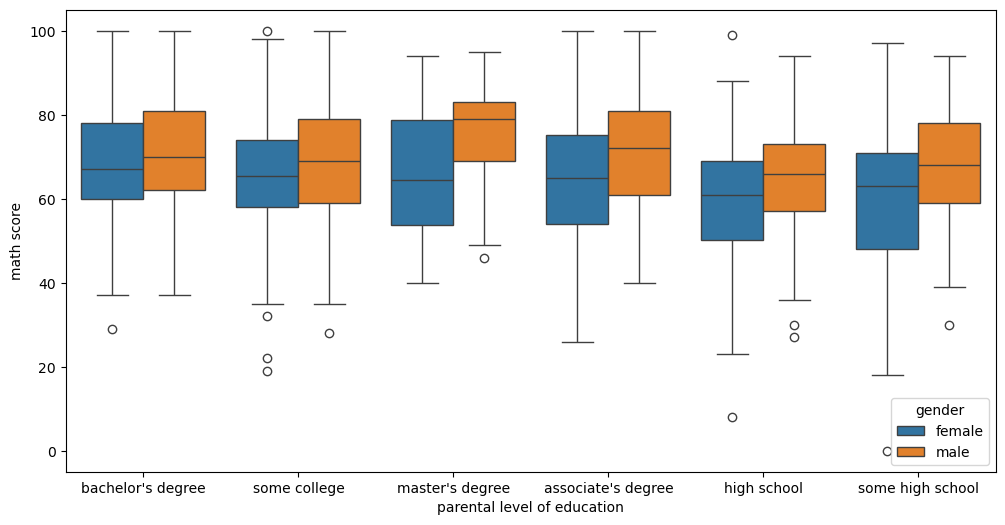

In [64]:
plt.figure(figsize=(12,6))
sns.boxplot(x="parental level of education",y="math score",data=df,hue="gender")

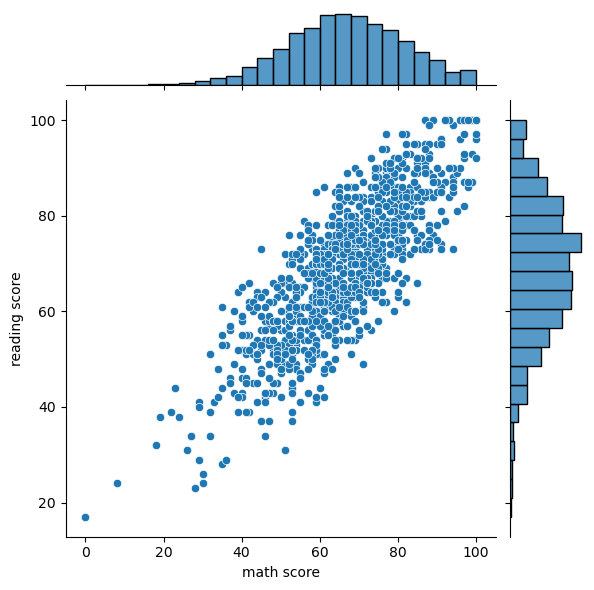

In [65]:
sns.jointplot(x="math score",y="reading score",data=df)

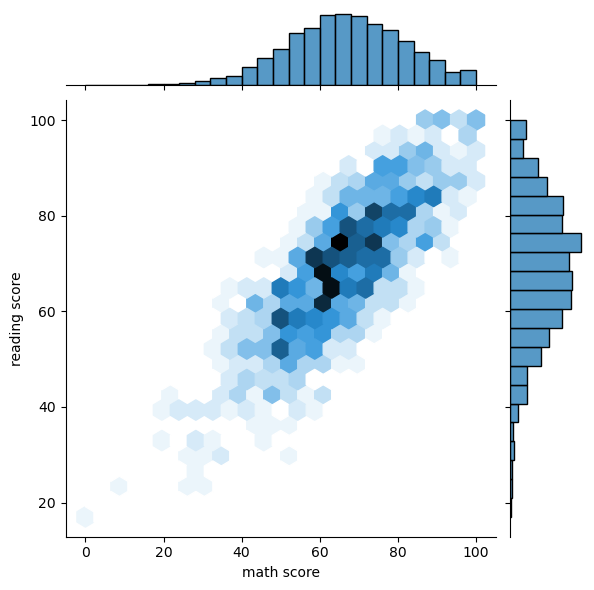

In [66]:
sns.jointplot(x="math score",y="reading score",data=df,kind="hex")

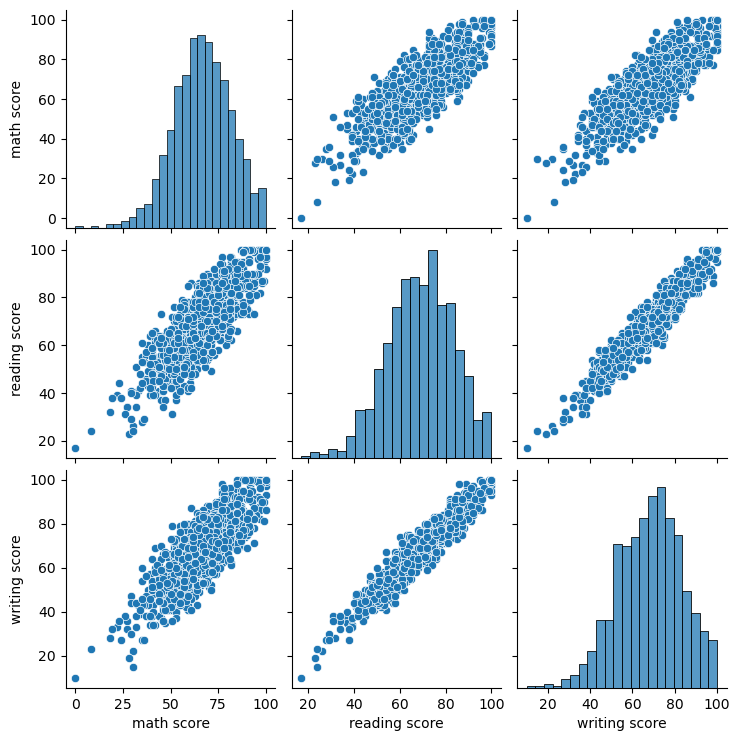

In [67]:
sns.pairplot(df)

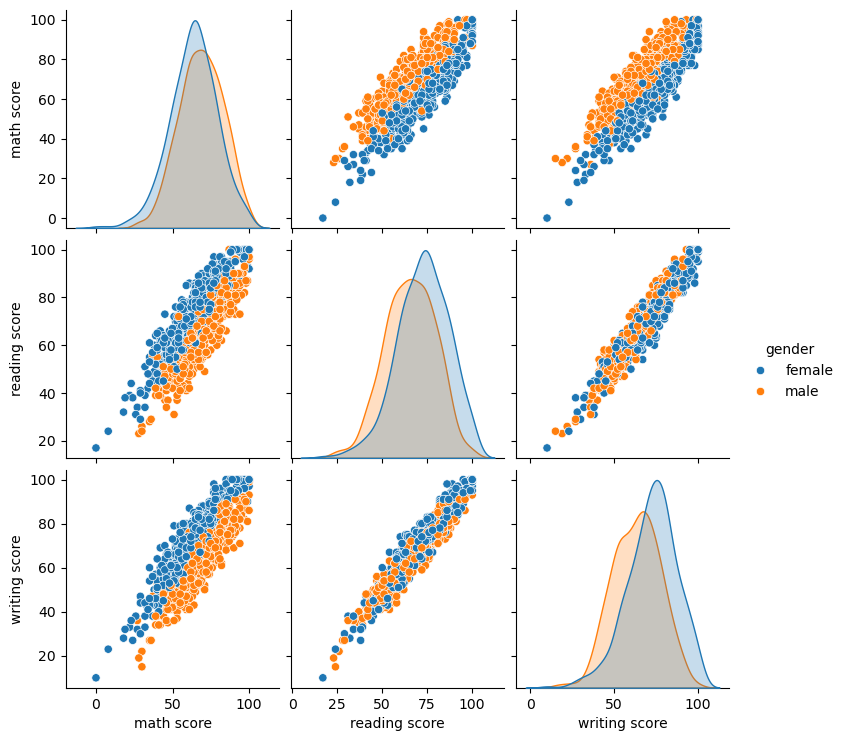

In [69]:
sns.pairplot(df,hue="gender")

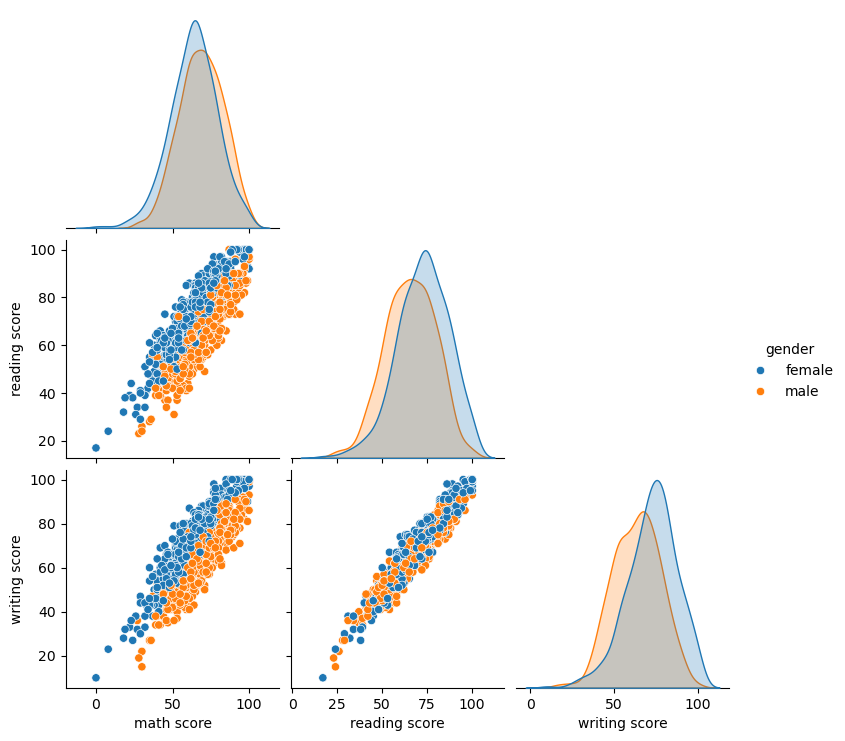

In [70]:
sns.pairplot(df,hue="gender",corner=True)

Streamlit 是一個開源的 Python 庫，用於快速構建和共享數據應用。它設計簡單，讓你可以專注於編寫 Python 代碼，而無需擔心前端開發的複雜性。以下是 Streamlit 的一些主要特點和優勢：

### 主要特點

1. **即時重新運行**：
   - 每次你修改並保存 Python 腳本時，Streamlit 都會自動重新運行應用並更新結果，讓開發過程更加流暢。

2. **簡單易用的 API**：
   - Streamlit 提供了簡單而強大的 API，用戶可以通過簡單的函數調用來添加文本、數據表、圖表、交互控件等。

3. **互動控件**：
   - Streamlit 支持多種互動控件，如按鈕、滑塊、選擇框、文件上傳等，幫助用戶創建豐富的交互界面。

4. **支持多種數據可視化**：
   - Streamlit 支持與多種數據可視化庫（如 Matplotlib、Plotly、Altair 等）集成，可以輕鬆地展示各類圖表和數據視覺化結果。

5. **輕鬆部署和分享**：
   - 應用可以輕鬆部署到雲端，並通過鏈接與他人分享，讓團隊協作更加方便。

### 主要優勢

1. **降低開發成本**：
   - Streamlit 的設計使得開發者可以快速構建原型，減少了傳統前後端分離開發的複雜性和時間成本。

2. **即時反饋**：
   - 即時重新運行和更新功能讓開發者可以快速看到代碼變更的效果，提高了開發效率。

3. **靈活性和擴展性**：
   - Streamlit 可以輕鬆與其他 Python 庫集成，如數據處理的 Pandas、數據科學的 NumPy 和 SciPy，以及機器學習的 Scikit-learn 等，擁有很強的靈活性和擴展性。

### 安裝與入門

#### 安裝

你可以通過 pip 安裝 Streamlit：

```bash
pip install streamlit
```
運行以下測試
```bash
streamlit hello
```

當然，以下是SymPy的詳細說明，涵蓋了SymPy的簡介、應用領域、安裝與設置以及基礎符號操作。

### SymPy簡介

#### SymPy是什麼
SymPy是一個用於符號計算的Python庫。它提供了計算代數表達式、求解方程、進行微積分、矩陣運算和數學簡化的功能。SymPy的目的是成為一個全功能的計算機代數系統（CAS），同時保持代碼的簡單和易於理解。

SymPy 的特點：
- **符號計算**：SymPy 能處理符號計算，而不僅僅是數值計算。這意味著它可以處理抽象的數學表達式，並進行各種操作如展開、因式分解、簡化等。
- **用Python編寫**：SymPy 完全用 Python 編寫，並且可以無縫地與 Python 代碼集成。
- **開源**：SymPy 是一個開源項目，任何人都可以免費使用和貢獻。

#### SymPy的應用領域
SymPy 在許多領域都有應用，包括但不限於：
- **教育**：用於教學和學習數學，幫助學生理解數學概念和演算法。
- **工程**：在機械、電氣和土木工程中，用於符號運算和解析解。
- **物理**：解決物理中的符號方程和問題，如運動方程和電磁學方程。
- **數學研究**：用於數學研究中的符號運算，幫助數學家進行理論分析。
- **計算機科學**：在算法設計和分析中，用於符號推理和自動推導。

#### 安裝與設置
SymPy 可以通過Python包管理工具pip進行安裝。以下是安裝SymPy的步驟：

1. 安裝Python：確保已經安裝了Python（建議使用Python 3）。
2. 使用pip安裝SymPy：
   ```bash
   pip install sympy
   ```
3. 安裝完成後，可以在Python代碼中導入SymPy：
   ```python
   import sympy as sp
   ```

### 基礎符號操作

#### 符號的定義（Symbol）
在SymPy中，符號是用來表示數學中的變量的。可以使用`symbols`函數來定義符號。


#### 基本符號表達式（Expression）
符號表達式是由符號組成的數學表達式。SymPy允許對符號表達式進行各種數學操作，如加、減、乘、除、冪等。



In [10]:
import sympy as sp
from IPython.display import display, Math
# 定義符號變量
x,y = sp.symbols("x y")
expr1 = x + 2 * y
expr2 = x ** 2 + y ** 2
expr3 = x * y + x / y
#顯示表達式
print("表達式1:",expr1)
print("表達式2:",expr2)
print("表達式3:",expr3)

print(sp.latex(expr1))
print(sp.latex(expr2))
print(sp.latex(expr3))

display(Math(sp.latex(expr1)))
display(Math(sp.latex(expr2)))
display(Math(sp.latex(expr3)))

表達式1: x + 2*y
表達式2: x**2 + y**2
表達式3: x*y + x/y
x + 2 y
x^{2} + y^{2}
x y + \frac{x}{y}


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [12]:
# 顯示希臘字母
display(Math(r'\alpha, \beta, \gamma'))

<IPython.core.display.Math object>

In [14]:
# 顯示數學常數
display(Math(r'\pi, e'))

<IPython.core.display.Math object>

In [15]:
# 顯示特殊函數
display(Math(r'\sin, \cos, \exp, \log'))

<IPython.core.display.Math object>